In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_step_metrics(df, start_date='2022-01-01', scale_factor=1000):
    # Convert string dictionary to actual dictionary if needed
    if isinstance(df['Purchased_This_Step'].iloc[0], str):
        df['Purchased_This_Step'] = df['Purchased_This_Step'].apply(eval)
    
    # Create separate columns for purchases of each brand
    df['Purchases_A'] = df['Purchased_This_Step'].apply(lambda x: x.get('A', 0))
    df['Purchases_B'] = df['Purchased_This_Step'].apply(lambda x: x.get('B', 0))
    
    # Group by Step and calculate metrics
    step_metrics = df.groupby('Step').agg({
        'Purchases_A': 'sum',
        'Purchases_B': 'sum',
        'tv_A': 'first',
        'web_A': 'first',
        'tv_B': 'first',
        'web_B': 'first',
        'price_A': 'first',
        'price_B': 'first'
    }).reset_index()
    
    # Add date column
    step_metrics['Date'] = pd.to_datetime(start_date) + pd.to_timedelta(step_metrics['Step'], unit='W')
    
    # Calculate scaled volumes
    step_metrics['Volume_A'] = step_metrics['Purchases_A'] * scale_factor
    step_metrics['Volume_B'] = step_metrics['Purchases_B'] * scale_factor
    
    # Calculate scaled values (price × volume)
    step_metrics['Value_A'] = step_metrics['Volume_A'] * step_metrics['price_A']
    step_metrics['Value_B'] = step_metrics['Volume_B'] * step_metrics['price_B']
    
    return step_metrics

# Example usage:
# df = pd.read_csv('agent_df_UNOPT.csv')
# step_metrics = calculate_step_metrics(df, start_date='2023-01-01', scale_factor=1000)
# print(step_metrics.head())

In [3]:
def plot_brand_comparison(step_metrics_list, scenario_names, metric='value'):
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Plot each scenario
    for step_metrics, scenario in zip(step_metrics_list, scenario_names):
        if metric.lower() == 'value':
            # Plot values
            plt.plot(step_metrics['Date'], step_metrics['Value_A'], 
                    label=f'Brand A - {scenario}')
            plt.plot(step_metrics['Date'], step_metrics['Value_B'], 
                    label=f'Brand B - {scenario}', linestyle='--')
            plt.ylabel('Value ($)')
        else:  # volume
            # Plot volumes
            plt.plot(step_metrics['Date'], step_metrics['Volume_A'], 
                    label=f'Brand A - {scenario}')
            plt.plot(step_metrics['Date'], step_metrics['Volume_B'], 
                    label=f'Brand B - {scenario}', linestyle='--')
            plt.ylabel('Volume (units)')
    
    plt.title(f'Brand Comparison - {metric.capitalize()}')
    plt.xlabel('Date')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt

# Example usage:
# Load and process both CSV files
# df1 = pd.read_csv('scenario1.csv')
# df2 = pd.read_csv('scenario2.csv')
# 
# step_metrics1 = calculate_step_metrics(df1, start_date='2023-01-01', scale_factor=1000)
# step_metrics2 = calculate_step_metrics(df2, start_date='2023-01-01', scale_factor=1000)
#
# # Create comparison plot
# plot_brand_comparison(
#     step_metrics_list=[step_metrics1, step_metrics2],
#     scenario_names=['Baseline', 'Test'],
#     metric='value'
# )
# plt.show()

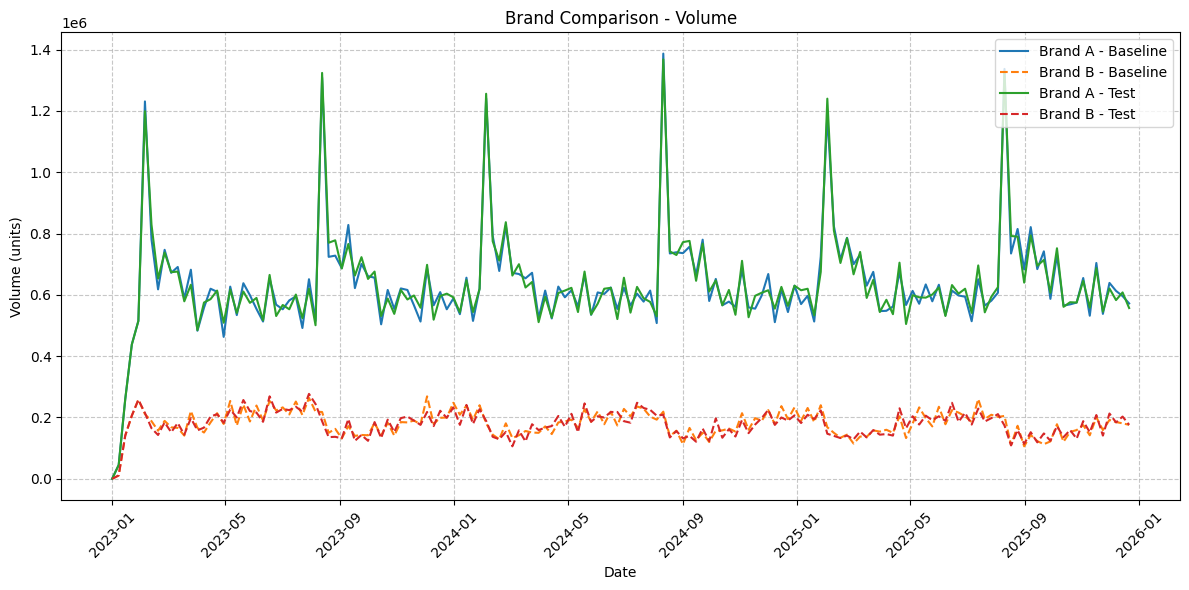

In [4]:
# Load and process both files
df1 = pd.read_csv('agent_df_UNOPT.csv')
df2 = pd.read_csv('agent_df_OPT.csv')

# Calculate metrics for both scenarios
step_metrics1 = calculate_step_metrics(df1, start_date='2023-01-01', scale_factor=1000)
step_metrics2 = calculate_step_metrics(df2, start_date='2023-01-01', scale_factor=1000)

# Create comparison plot
plot_brand_comparison(
    step_metrics_list=[step_metrics1, step_metrics2],
    scenario_names=['Baseline', 'Test'],
    metric='volume'
)
plt.show()

In [5]:
def calculate_totals(step_metrics):
    """
    Calculate total and cumulative metrics from step_metrics dataframe.
    Returns a dictionary with total volume, value, and their cumulative sums.
    """
    # Calculate total volume and value for the entire period
    total_volume = step_metrics['Volume_A'].sum() + step_metrics['Volume_B'].sum()
    total_value = step_metrics['Value_A'].sum() + step_metrics['Value_B'].sum()
    
    # Calculate brand-specific totals
    total_volume_A = step_metrics['Volume_A'].sum()
    total_volume_B = step_metrics['Volume_B'].sum()
    total_value_A = step_metrics['Value_A'].sum()
    total_value_B = step_metrics['Value_B'].sum()
    
    return {
        'Total_Volume': total_volume,
        'Total_Value': total_value,
        'Total_Volume_A': total_volume_A,
        'Total_Volume_B': total_volume_B,
        'Total_Value_A': total_value_A,
        'Total_Value_B': total_value_B
    }

# Example usage:
# totals = calculate_totals(step_metrics)
# print(f"Total Volume: {totals['Total_Volume']:,.0f}")
# print(f"Total Value: ${totals['Total_Value']:,.2f}")

In [6]:
totals = calculate_totals(step_metrics1)

# Print results
print(f"Total Volume: {totals['Total_Volume']:,.0f}")
print(f"Total Value: ${totals['Total_Value']:,.2f}")
print(f"\nBy Brand:")
print(f"Volume A: {totals['Total_Volume_A']:,.0f}")
print(f"Volume B: {totals['Total_Volume_B']:,.0f}")
print(f"Value A: ${totals['Total_Value_A']:,.2f}")
print(f"Value B: ${totals['Total_Value_B']:,.2f}")

Total Volume: 127,364,000
Total Value: $636,820,000.00

By Brand:
Volume A: 99,285,000
Volume B: 28,079,000
Value A: $496,425,000.00
Value B: $140,395,000.00


In [7]:
totals = calculate_totals(step_metrics2)

# Print results
print(f"Total Volume: {totals['Total_Volume']:,.0f}")
print(f"Total Value: ${totals['Total_Value']:,.2f}")
print(f"\nBy Brand:")
print(f"Volume A: {totals['Total_Volume_A']:,.0f}")
print(f"Volume B: {totals['Total_Volume_B']:,.0f}")
print(f"Value A: ${totals['Total_Value_A']:,.2f}")
print(f"Value B: ${totals['Total_Value_B']:,.2f}")

Total Volume: 127,318,000
Total Value: $636,590,000.00

By Brand:
Volume A: 99,458,000
Volume B: 27,860,000
Value A: $497,290,000.00
Value B: $139,300,000.00


In [8]:
def plot_ad_comparison(step_metrics_list, scenario_names):
    # Set up the plot
    plt.figure(figsize=(12, 6))
    
    # Plot each scenario
    for step_metrics, scenario in zip(step_metrics_list, scenario_names):
        # Plot TV spend
        plt.plot(step_metrics['Date'], step_metrics['tv_A'], 
                label=f'TV A - {scenario}')
        plt.plot(step_metrics['Date'], step_metrics['tv_B'], 
                label=f'TV B - {scenario}', linestyle='--')
        
        # Plot Web spend
        plt.plot(step_metrics['Date'], step_metrics['web_A'], 
                label=f'Web A - {scenario}')
        plt.plot(step_metrics['Date'], step_metrics['web_B'], 
                label=f'Web B - {scenario}', linestyle='--')
    
    plt.title('Advertising Spend Comparison')
    plt.xlabel('Date')
    plt.ylabel('Spend ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt

# Example usage:
# plot_ad_comparison(
#     step_metrics_list=[step_metrics1, step_metrics2],
#     scenario_names=['Baseline', 'Test']
# )
# plt.show()

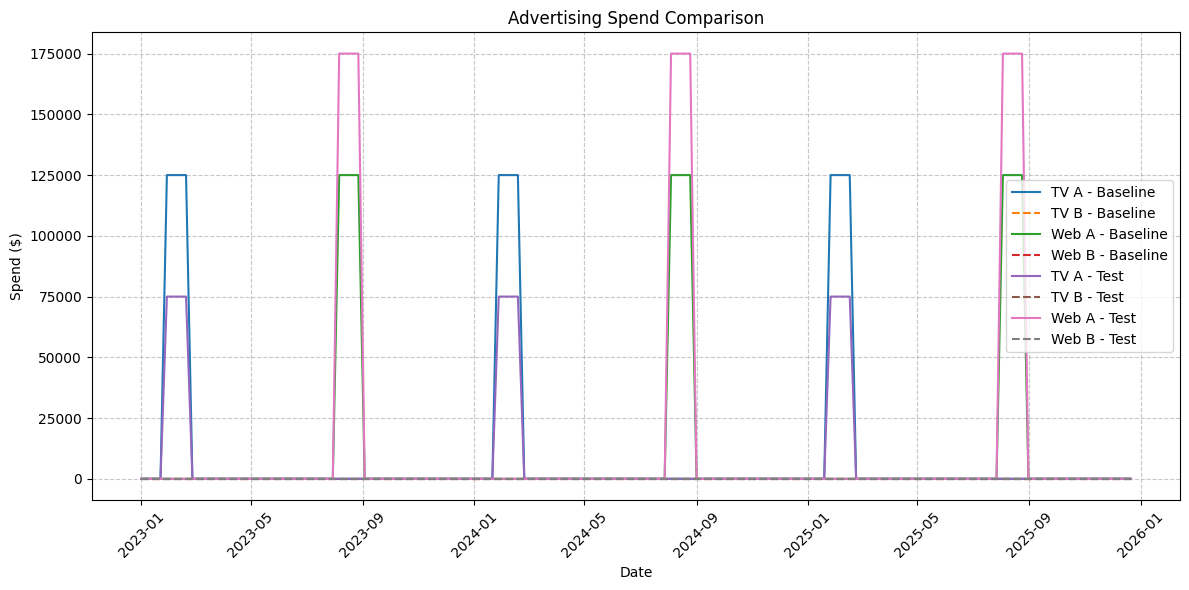

In [9]:
# Calculate metrics for both scenarios
step_metrics1 = calculate_step_metrics(df1, start_date='2023-01-01', scale_factor=1000)
step_metrics2 = calculate_step_metrics(df2, start_date='2023-01-01', scale_factor=1000)

# Create ad spend comparison plot
plot_ad_comparison(
    step_metrics_list=[step_metrics1, step_metrics2],
    scenario_names=['Baseline', 'Test']
)
plt.show()

In [10]:
def plot_average_channel_preferences(df):
    # Convert string dictionary to actual dictionary if needed
    if isinstance(df['Ad_Channel_Preference'].iloc[0], str):
        df['Ad_Channel_Preference'] = df['Ad_Channel_Preference'].apply(eval)
    
    # Extract Web and TV preferences
    df['Web_Preference'] = df['Ad_Channel_Preference'].apply(lambda x: x.get('Web', 0))
    df['TV_Preference'] = df['Ad_Channel_Preference'].apply(lambda x: x.get('TV', 0))
    
    # Calculate means for each step
    step_means = df.groupby('Step')[['Web_Preference', 'TV_Preference']].mean()
    
    # Print first few rows to check values
    print("First few steps' preferences:")
    print(step_means.head())
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(step_means.index, step_means['Web_Preference'], label='Web')
    plt.plot(step_means.index, step_means['TV_Preference'], label='TV')
    
    # Add a horizontal line at 0.7 and 0.3 to show expected values
    plt.axhline(y=0.7, color='gray', linestyle=':', alpha=0.5, label='Expected Web (0.7)')
    plt.axhline(y=0.3, color='gray', linestyle=':', alpha=0.5, label='Expected TV (0.3)')
    
    plt.title('Average Channel Preferences Over Time')
    plt.xlabel('Step')
    plt.ylabel('Preference')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    
    return plt

First few steps' preferences:
      Web_Preference  TV_Preference
Step                               
0           0.700129       0.299871
1           0.700129       0.299871
2           0.700129       0.299871
3           0.700129       0.299871
4           0.700129       0.299871


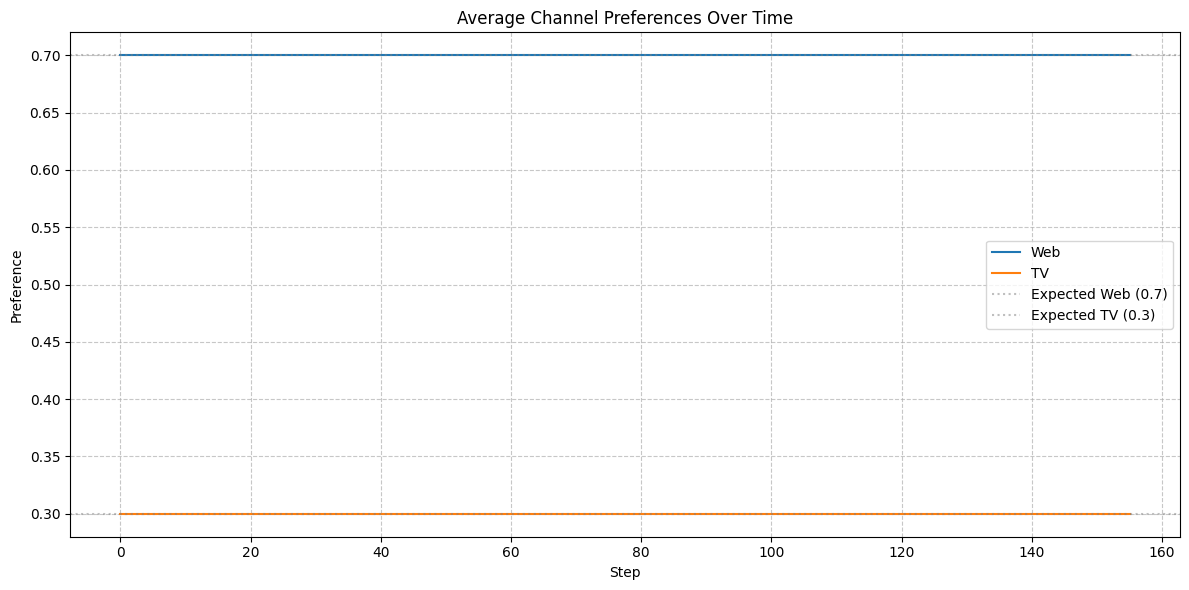

In [11]:
plot_average_channel_preferences(df1)
plt.show()

In [12]:
def plot_rolling_volumes(step_metrics, window=4):
    """
    Plot rolling average volumes and market share for both brands
    window: number of weeks to use for rolling average
    """
    # Calculate rolling averages
    roll_vol_A = step_metrics['Volume_A'].rolling(window=window).mean()
    roll_vol_B = step_metrics['Volume_B'].rolling(window=window).mean()
    
    # Calculate market share
    total_volume = step_metrics['Volume_A'] + step_metrics['Volume_B']
    share_A = step_metrics['Volume_A'] / total_volume
    roll_share_A = share_A.rolling(window=window).mean()
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot volumes
    ax1.plot(step_metrics['Date'], roll_vol_A, label='Brand A')
    ax1.plot(step_metrics['Date'], roll_vol_B, label='Brand B', linestyle='--')
    ax1.set_ylabel('Volume (Rolling Average)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Plot market share
    ax2.plot(step_metrics['Date'], roll_share_A * 100, label='Brand A Share %')
    ax2.axhline(y=50, color='gray', linestyle=':', alpha=0.5)
    ax2.set_ylabel('Market Share %')
    ax2.set_xlabel('Date')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    plt.suptitle(f'{window}-Week Rolling Average Volumes and Market Share')
    plt.tight_layout()
    
    return plt

# Example usage:
# plot_rolling_volumes(step_metrics, window=4)
# plt.show()

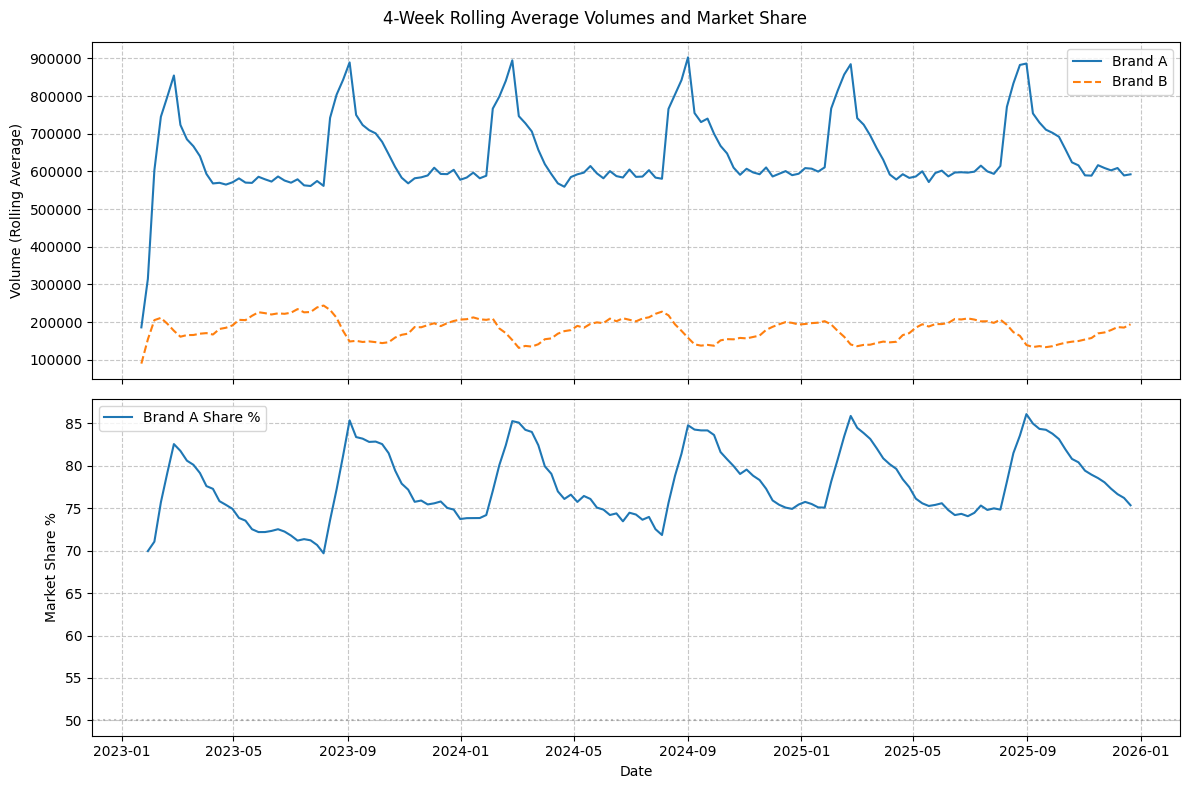

In [14]:
# Example usage:
plot_rolling_volumes(step_metrics2, window=4)
plt.show()

In [15]:
def plot_annual_market_share(step_metrics):
    """
    Create a bar chart showing average market share by year for both brands
    """
    # Add year column
    step_metrics['Year'] = step_metrics['Date'].dt.year
    
    # Calculate market shares
    total_volume = step_metrics['Volume_A'] + step_metrics['Volume_B']
    step_metrics['Share_A'] = step_metrics['Volume_A'] / total_volume
    step_metrics['Share_B'] = step_metrics['Volume_B'] / total_volume
    
    # Calculate annual averages
    annual_shares = step_metrics.groupby('Year').agg({
        'Share_A': 'mean',
        'Share_B': 'mean'
    })
    
    # Create bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot bars
    x = range(len(annual_shares.index))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], annual_shares['Share_A'] * 100, 
            width, label='Brand A', color='lightgray')
    plt.bar([i + width/2 for i in x], annual_shares['Share_B'] * 100, 
            width, label='Brand B', color='darkgray')
    
    # Add value labels on top of bars
    for i in x:
        plt.text(i - width/2, annual_shares['Share_A'].iloc[i] * 100 + 0.5, 
                f"{annual_shares['Share_A'].iloc[i]*100:.1f}%", 
                ha='center')
        plt.text(i + width/2, annual_shares['Share_B'].iloc[i] * 100 + 0.5, 
                f"{annual_shares['Share_B'].iloc[i]*100:.1f}%", 
                ha='center')
    
    # Customize plot
    plt.ylabel('Market Share %')
    plt.title('Average Annual Market Share by Brand')
    plt.xticks(x, annual_shares.index)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    return plt

# Example usage:
# plot_annual_market_share(step_metrics)
# plt.show()

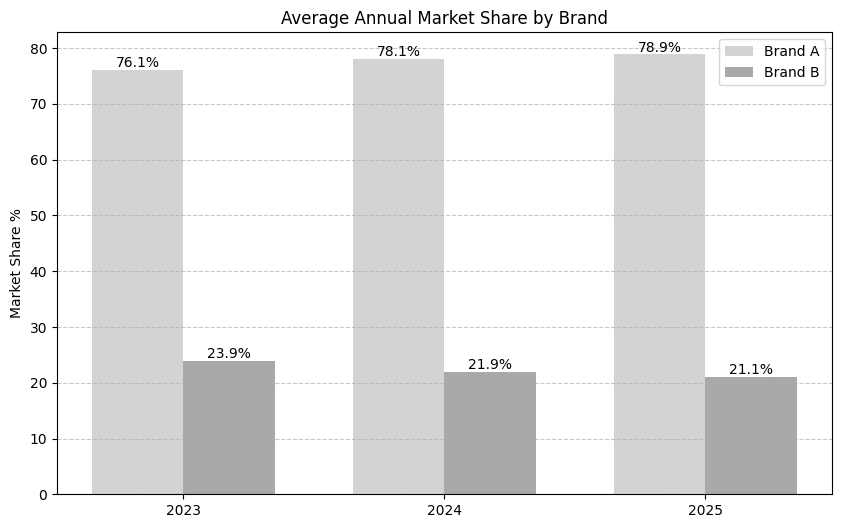

In [16]:
# Example usage:
plot_annual_market_share(step_metrics2)
plt.show()